# Bandit Class

In [6]:
import numpy as np

class Bandit:
    
    """
    
    Class to represent a slot machine with a secret probability of reward
    """
    
    def __init__(self, game):
        self.__probability = np.random.uniform()
        
        #----------------- Addition ------------------------------------------------
        self.game = game
        #-------------------------------------------------------------------------------

        
        
    def __repr__(self):
        return "this is a bandit object with secret probability "  + str(self.__probability)
    
    def pull(self):
        
        """
        
        returns true representing a reward or false representing no reward
        """
        
        #----------------- Addition ------------------------------------------------
        
        # Addition:  is the solver following the rules (ie if there are moves remaining)
        
        if not self.game.moves_remaining():
            raise Exception ("Bandit pull called with no moves remaining")
        
        #------------------ Addition ---------------------------------------------------

        #return np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        result = np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        self.game.history.append(result)
        
        self.game.score += result
        
        return result # not to break previous functinality
    
        #-------------------------------------------------------------------------------

    

---

# Solver Class

In [7]:
class RandomSolver:
    
    """
    represents a player in a multi-armed bandit problem
    the algorithm is to choose a bandit completely at random
    
    """
    
    def __init__(self, bandits):
        # at the smae time we crate the solver, we tell the solver where the bandits are
        
        self.bandits = bandits
    
    def move(self):
        
        """
        
        makes this solver choose a bandit and call pull on it. Returns true is reward is given
        """
        
        
        # attriute that is also a method
        
        # needs to choose one of these bandits and pull the lever
        # this is where the strategy goes
        
        # choose at random (use any of the random methods in np)
        
        chosen = np.random.randint(0, len(bandits))
        #print("Choosing bandit number", chosen)
        
        # to gt the actual bandit object
        
        return bandits[chosen].pull()
        # returns true or false

---

# Game Class

In [8]:
#----------- Addition ---------------------

import matplotlib.pyplot as plt

#------------------------------------------

class Game:
    
    """
    This is a class to represent the overall rules of the game
    """
    
    def __init__(self, num_moves):
        
        self.num_moves = num_moves # store as an instance attr
        
        self.score = 0
        
        self.history = []
        
    def moves_remaining(self):
        
        # this is a boolean method to return true or false
        
        return self.num_moves > len(self.history)
    
    # ----------- Addition -------------------------
    
    def plot_history(self):
        
        #plt.plot(self.history) -- this might be boring
        
        plt.plot(np.cumsum(self.history))
        plt.title('Reward History')
        plt.xlabel('move number')
        plt.ylabel('total reward')

---

---

# Play the Game!

---

In [9]:
game = Game(2)

In [10]:
bandits = [Bandit(game) for i in range(10)]

In [11]:
s = RandomSolver(bandits)

In [12]:
game.history

[]

In [13]:
s.move()

False

In [14]:
s.move()

True

In [15]:
game.history

[False, True]

In [16]:
game.score

1

In [17]:
s.move()

Exception: Bandit pull called with no moves remaining

This is correct
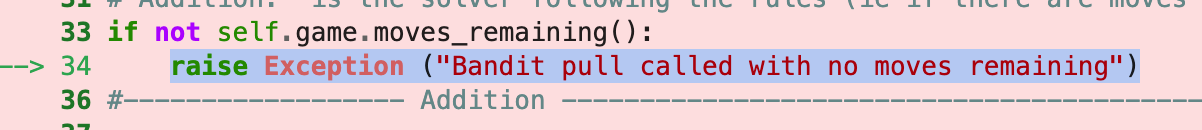

# Adding Graphs

In [26]:
game = Game(300)
bandits = [Bandit(game) for i in range(10)]
s = RandomSolver(bandits)

for i in range(game.num_moves):
    s.move()
game.plot_history()

AttributeError: 'Bandit' object has no attribute 'game_best_probability'

---

# What is the rate of increase in rewards?

# ie Best Possible Reward -- this is the baseline of study 

---

## Revising the Game Class (to determine best probability)

In [19]:
#### TRYING THIS AGAIN -- BY COPYING FROM PRIOR (DNU)

import matplotlib.pyplot as plt

class Game:
    
    """
    This is a class to represent the overall rules of the game
    """
    
    def __init__(self, num_moves):
        
        self.num_moves = num_moves # store as an instance attr
        
        self.score = 0
        
        self.history = []
        
        #------------ added new -----------
        
        self.best_probability = 0

        #----------------------------------
        
        def moves_remaining(self):
            
        # this is a boolean method to return true or false
        
            return self.num_moves > len(self.history)
    
    
    def plot_history(self):
        
        #plt.plot(self.history) -- this might be boring
        
        plt.plot(np.cumsum(self.history))
        plt.title('Reward History')
        plt.xlabel('move number')
        plt.ylabel('total reward')
    
    
        #------------ added new ---------------------------------
            
#        plt.plot([0, len(self.history)], [0, len(self.history) * self.best_probability], color = 'r', linestyle = '--', linewidth=1)
        
        #---------------------------------------------------------
        

In [29]:
## COPIED from originall and trying again
#----------- Addition ---------------------

import matplotlib.pyplot as plt

#------------------------------------------

class Game:
    
    """
    This is a class to represent the overall rules of the game
    """
    
    def __init__(self, num_moves):
        
        self.num_moves = num_moves # store as an instance attr
        
        self.score = 0
        
        self.history = []
        
        self.best_probability = 0 # added new
        
    def moves_remaining(self):
        
        # this is a boolean method to return true or false
        
        return self.num_moves > len(self.history)
    
    # ----------- Addition -------------------------
    
    def plot_history(self):
        
        #plt.plot(self.history) -- this might be boring
        
        plt.plot(np.cumsum(self.history))
        plt.title('Reward History')
        plt.xlabel('move number')
        plt.ylabel('total reward')
        plt.plot([0, len(self.history)], [0, len(self.history) * self.best_probability], color = 'r', linestyle = '--', linewidth=1) # added new


---

## Revising the Bandit Class (for best probability)

In [1]:
#### TRYING THIS AGAIN -- BY COPYING FROM PRIOR (DNU)


import numpy as np

class Bandit:
    
    """
    
    Class to represent a slot machine with a secret probability of reward
    """
    
    def __init__(self, game):
        self.__probability = np.random.uniform()
        
        self.game = game

        #--------------- Addition --------------------
        
        if self.__probability > self.game.best_probability:
            self.game.best_probability = self.__probability
        
        # this should hopefully allow the game to know what is the best probability
        
        #-----------------------------------
        
        
    def __repr__(self):
        return "this is a bandit object with secret probability "  + str(self.__probability)
    
    def pull(self):
        
        """
        
        returns true representing a reward or false representing no reward
        """
        
        
        # Addition:  is the solver following the rules (ie if there are moves remaining)
        
        if not self.game.moves_remaining():
            raise Exception ("Bandit pull called with no moves remaining")
        

        #return np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        result = np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        self.game.history.append(result)
        
        self.game.score += result
        
        return result # not to break previous functinality

In [34]:
## COPIED from originall and trying again

import numpy as np

class Bandit:
    
    """
    
    Class to represent a slot machine with a secret probability of reward
    """
    
    def __init__(self, game):
        self.__probability = np.random.uniform()
        
        self.game = game
        
        #----------------- Addition ------------------------------------------------
        if self.__probability > self.game.best_probability: # added
            self.game.best_probability = self.__probability # added
        #-------------------------------------------------------------------------------

        
        
    def __repr__(self):
        return "this is a bandit object with secret probability "  + str(self.__probability)
    
    def pull(self):
        
        """
        
        returns true representing a reward or false representing no reward
        """
        
        #----------------- Addition ------------------------------------------------
        
        # Addition:  is the solver following the rules (ie if there are moves remaining)
        
        if not self.game.moves_remaining():
            raise Exception ("Bandit pull called with no moves remaining")
        
        #------------------ Addition ---------------------------------------------------

        #return np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        result = np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        self.game.history.append(result)
        
        self.game.score += result
        
        return result # not to break previous functinality
    
        #-------------------------------------------------------------------------------

    

---

## Keeping Solver Class as is (no change)

In [32]:
class RandomSolver:
    
    """
    represents a player in a multi-armed bandit problem
    the algorithm is to choose a bandit completely at random
    
    """
    
    def __init__(self, bandits):
        # at the smae time we crate the solver, we tell the solver where the bandits are
        
        self.bandits = bandits
    
    def move(self):
        
        """
        
        makes this solver choose a bandit and call pull on it. Returns true is reward is given
        """
        
        
        # attriute that is also a method
        
        # needs to choose one of these bandits and pull the lever
        # this is where the strategy goes
        
        # choose at random (use any of the random methods in np)
        
        chosen = np.random.randint(0, len(bandits))
        #print("Choosing bandit number", chosen)
        
        # to gt the actual bandit object
        
        return bandits[chosen].pull()
        # returns true or false

---

# Play Game Again!

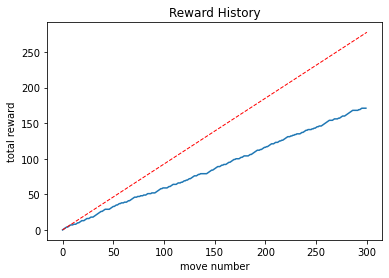

In [35]:
game = Game(300)

bandits = [Bandit(game) for i in range(10)]

s = RandomSolver(bandits)

for i in range(game.num_moves):
    s.move()

game.plot_history()

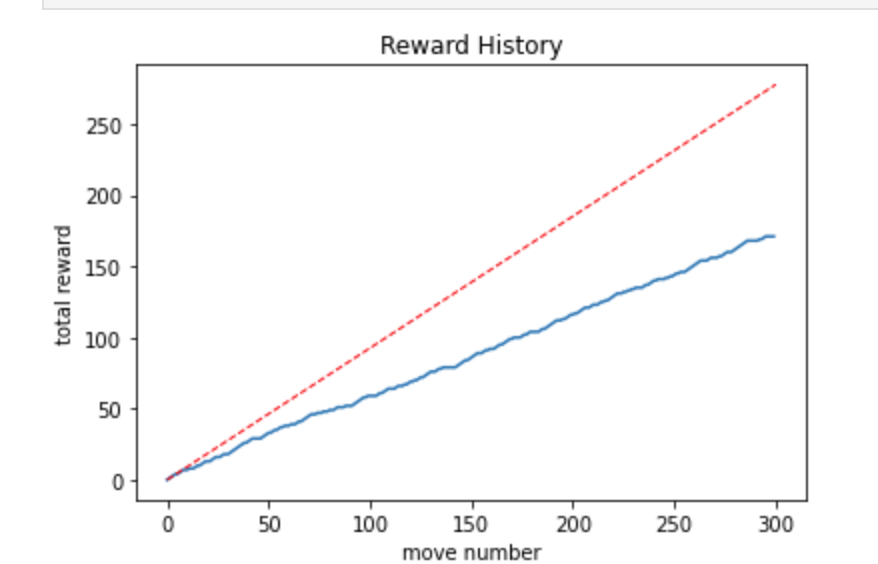